# 6. Visualizing data

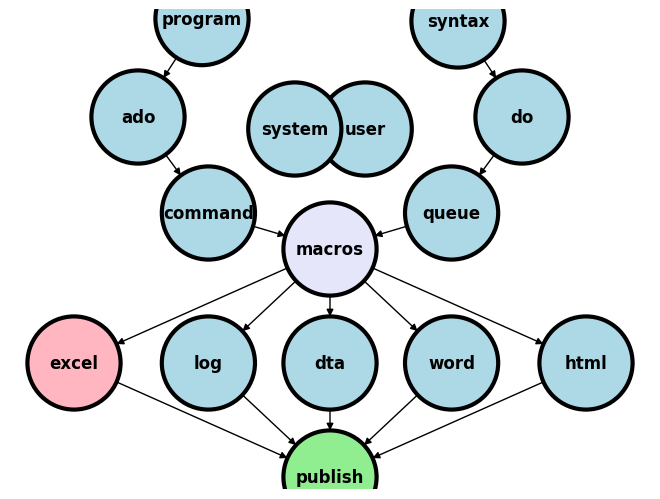

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("user", pos=(550, 500))
G.add_node("system", pos=(-550, 500))
G.add_node("program", pos=(-2000, 960))
G.add_node("syntax", pos=(2000, 950))
G.add_node("ado", pos=(-3000, 550))
G.add_node("do", pos=(3000, 550))
G.add_node("command", pos=(-1900, 150))
G.add_node("queue", pos=(1900, 150))
G.add_node("macros", pos=(0, 0))
G.add_node("dta", pos=(0, -475))
G.add_node("log", pos=(-1900, -475))
G.add_node("excel", pos=(-4000, -475))
G.add_node("word", pos=(1900, -475))
G.add_node("html", pos=(4000, -475))
G.add_node("publish", pos=(0, -950))
G.add_edges_from([("program", "ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue")])
G.add_edges_from([("command", "macros"), ("queue", "macros"), ("macros", "excel"), ("macros", "word"), ("macros", "html")])
G.add_edges_from([("macros", "dta"), ("macros", "log")])
G.add_edges_from([("dta", "publish"), ("log", "publish"), ("excel", "publish"), ("word", "publish"), ("html", "publish")])

pos = nx.get_node_attributes(G, 'pos')
node_colors = ["lightblue" if node not in ["macros", "excel", "publish"] else "lightpink" if node == "excel" else "lavender" if node == "macros" else "lightgreen" for node in G.nodes()]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=4500, node_color=node_colors, linewidths=3)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Set edge color to black for better contrast
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

**Note:** we now replace "results" with "macros". HW1 invited you to hardcode results into your `.do` file. By HW2, however, you were expected to use macros instead of hardcoding, introducing flexibility to your `.do` file scripts. This figurative update is a reminder to never hardcode output in a `.do` file. Consider the following *Directed Acyclic Graph:*

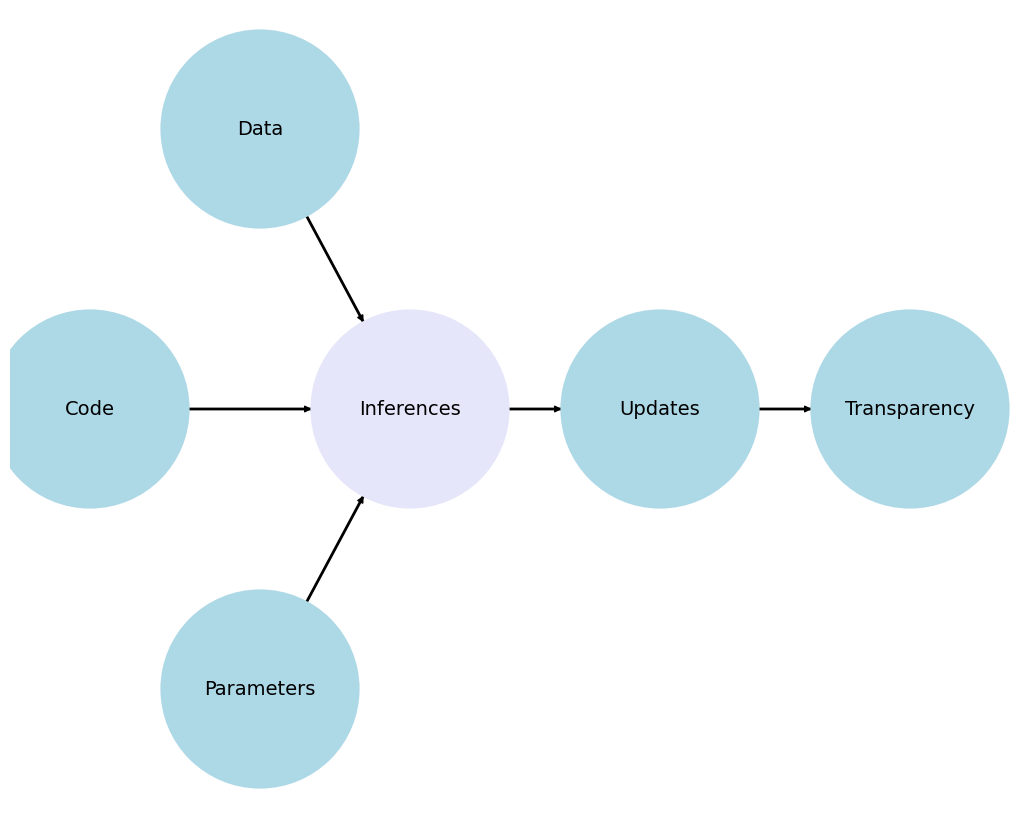

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("Data", pos=(-2500, 700))
G.add_node("Code", pos=(-4200, 0))
G.add_node("Inferences", pos=(-1000, 0))
G.add_node("Parameters", pos=(-2500, -700))
G.add_node("Updates", pos=(1500, 0))
G.add_node("Transparency", pos=(4000, 0))

G.add_edges_from([("Data", "Inferences")])
G.add_edges_from([("Code", "Inferences")])
G.add_edges_from([("Parameters", "Inferences")])
G.add_edges_from([("Inferences", "Updates")])
G.add_edges_from([("Updates", "Transparency")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"Inferences": "Inferences",
          "Data": "Data",
          "Code": "Code",
          "Parameters": "Parameters",
          "Updates": "Updates",
          "Transparency": "Transparency"}  # Added label for "NDI" node in the labels dictionary

# Update color for the "Scenarios" node
node_colors = ["lightblue","lightblue", "lavender", "lightblue", "lightblue", "lightblue"]
# node_colors = ["lightblue","lavender", "lavender", "lightgreen", "lightpink", "lightpink"]
# Suppress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=14) # , font_weight='bold'
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()

### Data
- The data being analyzed
### Code
- Your `.do` file scripts
### Parameters
- Heart of your output
   - `r()`
      - e.g. `r(mean)`, `r(se)`
   - `e()`
   - `c()`
- Bayesian parameters include *a priori* "beliefs"
   - Justifies ***not*** placing data "upstream" of parameters   
### Inferences
   - `r(p)`
   - `r(estimate)`, `r(lb)`, `r(ub)`
   - Including *posteriori* stance of Bayesian statistics
### Updates
   - New variables in model 
      - Multivariable regression exploring either new variables, altered functional forms, or interaction-terms (investigating effect-modification)

```stata
putexcel set table2.xlsx, replace 
putexcel B1=("slope (95%CI)")
local row=2 
foreach var of varlist `varlist' {
    qui regression `varlist'
    qui lincom word("`varlist'", `row')
    local estimate: di %3.2f `r(estimate)' (`r(lb)' - `r(ub)')
    di "`estimate'"
    putexcel B`row'=("`estimate'") 
    local row=`row' + 1 //row tracker in loop
    /*
    since no output is hardcoded, 
    minimal additional effort needed 
    when data, code, or parameters are updated
    */
}
``` 
### Transparency
   - Reproducibility of all the above by third-party
   - Most compelling when macros rather than hard-coded results are used as output from analyses

### 

## 6.1 oneway
- Just an outcome
- Or a predictor
## 6.2 `twoway`
- Typically outcome vs. predictor
- But can be correlational between two predictors

Let's revisit the first graph we produce in week one, but with a twist:

```stata
// Load the life expectancy dataset
webuse lifeexp, clear

// Encode the 'country' variable into a numeric variable with a new name 'Country'
encode country, gen(Country)

// Summarize the 'lexp' variable (life expectancy), capturing the mean
sum lexp, detail
local meanlife = r(mean)

// Create a scatter plot of life expectancy by the encoded 'Country' variable, with customizations
twoway (scatter lexp Country, mlabel(country)) ///
       (line lexp Country, sort) ///
       , legend(off) ytitle("Life Expectancy") xtitle("Countries") ///
       yline(`meanlife') text(`meanlife' `= _N/2' "Mean: `meanlife'", place(east) color(black))

// Export the graph as a PNG file, replacing any existing file with the same name
graph export lexp_bycountry.png, replace
```

This script includes:
- A summarization of `lexp` to calculate the mean life expectancy, which is then stored in a local macro for use in annotations.
- A scatter plot of life expectancy by country, with an additional line indicating the mean life expectancy across the dataset.
- Text annotation on the graph to display the mean life expectancy, positioned dynamically.
- An export command to save the graph as a PNG file.

This version refines the plotting to make the representation of data clearer and more informative, including dynamic placement for the mean life expectancy annotation. Feel free to adjust the specifics of the plotting commands (`mlabel`, `text`, `place`, etc.) to better suit your preferences and the characteristics of your dataset.

![](lexp_bycountry_review.png)

How may we edit our code to make this graph more meaningful?

## 6.3 adjusted
- Uses parameters (macros) from multivariable regression
- Statistical inferences (95%CI, p-values, credibility intervals) can be made
- Aspire towards this since its what science is all about
